<a href="https://colab.research.google.com/github/grace-s-ko/github-slideshow/blob/RNN/Stock_Prediction_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [197]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hafs/sse_210517.csv', date_parser = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1222,2021-05-11,82500.0,82600.0,81100.0,81200.0,81200.0,28996680.0
1223,2021-05-12,80800.0,81200.0,79800.0,80000.0,80000.0,35812268.0
1224,2021-05-13,78900.0,79600.0,78400.0,78500.0,78500.0,31490096.0
1225,2021-05-14,79000.0,80300.0,78900.0,80100.0,80100.0,16450920.0
1226,2021-05-17,80800.0,80900.0,79200.0,79600.0,79600.0,17740855.0


In [198]:
data_training = data[data['Date']<'2020-09-01'].copy()
data_test = data[data['Date']>='2020-09-01'].copy()

In [199]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

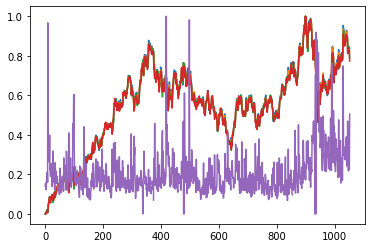

In [200]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
plt.plot(data_training)

In [201]:
x_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    x_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [202]:
x_train = np.where(np.isnan(x_train), 0, x_train)
y_train = np.where(np.isnan(y_train), 0, y_train)

In [203]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU

In [204]:
regressor = Sequential()

regressor.add(GRU(units = 60, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(GRU(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(GRU(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(GRU(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [205]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')
regressor.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
32/32 [==============================] - 9s 132ms/step - loss: 0.1712
Epoch 2/50
32/32 [==============================] - 4s 135ms/step - loss: 0.0151
Epoch 3/50
32/32 [==============================] - 4s 134ms/step - loss: 0.0089
Epoch 4/50
32/32 [==============================] - 4s 135ms/step - loss: 0.0094
Epoch 5/50
32/32 [==============================] - 4s 134ms/step - loss: 0.0065
Epoch 6/50
32/32 [==============================] - 4s 134ms/step - loss: 0.0089
Epoch 7/50
32/32 [==============================] - 4s 133ms/step - loss: 0.0097
Epoch 8/50
32/32 [==============================] - 4s 134ms/step - loss: 0.0071
Epoch 9/50
32/32 [==============================] - 4s 133ms/step - loss: 0.0089
Epoch 10/50
32/32 [==============================] - 4s 132ms/step - loss: 0.0119
Epoch 11/50
32/32 [==============================] - 4s 134ms/step - loss: 0.0074
Epoch 12/50
32/32 [==============================] - 4s 133ms/step - loss: 0.0069
Epoch 13/50
32/32 [======

In [206]:
past_60_days = data_test.tail(60)

In [207]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,82300.0,82800.0,81000.0,82600.0,25880879.0
1,83800.0,84200.0,82200.0,82200.0,25419886.0
2,81200.0,82900.0,81100.0,82000.0,20587314.0
3,81800.0,83600.0,81300.0,82000.0,26807651.0
4,84000.0,85400.0,83000.0,85300.0,34155986.0


In [208]:
inputs = scaler.transform(df)
inputs.shape[0]

234

In [209]:
x_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
x_test.shape, y_test.shape

((174, 60, 5), (174,))

In [210]:
x_test = np.where(np.isnan(x_test), 0, x_test)
y_test = np.where(np.isnan(y_test), 0, y_test)

In [211]:
y_pred = regressor.predict(x_test)

In [212]:
scaler.scale_

array([2.72331155e-05, 2.67522739e-05, 2.73224044e-05, 2.69978402e-05,
       1.54604190e-08])

In [213]:
scale = 1/scaler.scale_[0]
scale

36720.0

In [214]:
y_pred = y_pred*scale
y_test = y_test*scale

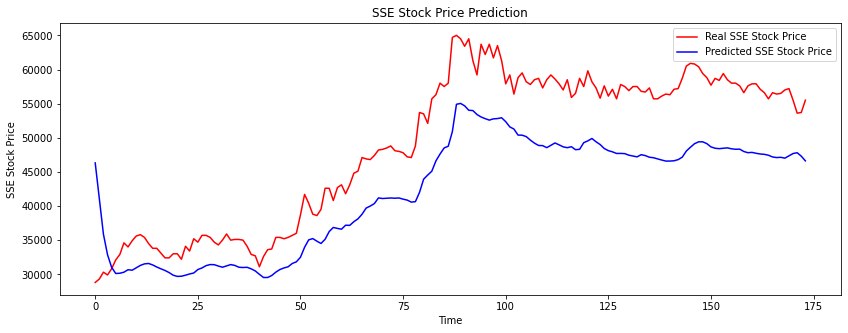

In [215]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real SSE Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted SSE Stock Price')
plt.title('SSE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('SSE Stock Price')
plt.legend()
plt.show()

In [216]:
#x = past_60_days.drop(['Date', 'Adj Close'], axis = 1)
#x = np.array(x)
#x.shape

In [217]:
#x = np.reshape(x,(1,60,5))
#x.shape

In [218]:
#y = regressor.predict(x)

In [219]:
d = data.tail(120)
d = d.drop(['Date', 'Adj Close'], axis = 1)

In [220]:
d = scaler.transform(d)

In [221]:
x = []

for i in range(60, 120):
    x.append(d[i-60:i])

x = np.array(x)

In [222]:
y = regressor.predict(x)
y = y*scale

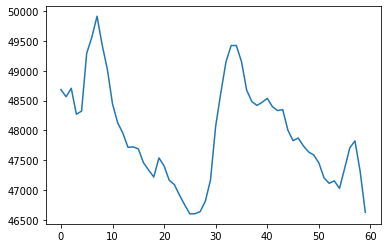

In [223]:
plt.plot(y)